In [1]:
# AI generated fingerprint detection using Machine Learning

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, load_model  # Added load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2  # For image processing
from PIL import Image, ImageOps  # For image operations


print("Step 1: Libraries imported successfully!")


Step 1: Libraries imported successfully!


In [2]:
# Step 2: Dataset Paths
data_dir = "/kaggle/input/socofing/SOCOFing"

real_path = os.path.join(data_dir, "Real")
altered_easy_path = os.path.join(data_dir, "Altered", "Altered-Easy")
altered_medium_path = os.path.join(data_dir, "Altered", "Altered-Medium")
altered_hard_path = os.path.join(data_dir, "Altered", "Altered-Hard")

altered_images_path = "/kaggle/working/Altered_Combined"
os.makedirs(altered_images_path, exist_ok=True)
for folder in [altered_easy_path, altered_medium_path, altered_hard_path]:
    for file in os.listdir(folder):
        src = os.path.join(folder, file)
        dst = os.path.join(altered_images_path, file)
        if os.path.isfile(src):
            tf.io.gfile.copy(src, dst, overwrite=True)
print("Step 2: Dataset paths configured and altered images combined successfully!")

Step 2: Dataset paths configured and altered images combined successfully!


In [3]:
# Step 3: Dataset Balancing and Preparation
processed_dataset_path = "/kaggle/working/Processed_Socofing"
os.makedirs(os.path.join(processed_dataset_path, "Real"), exist_ok=True)
os.makedirs(os.path.join(processed_dataset_path, "Altered"), exist_ok=True)

for file in os.listdir(real_path):
    src = os.path.join(real_path, file)
    dst = os.path.join(processed_dataset_path, "Real", file)
    tf.io.gfile.copy(src, dst, overwrite=True)

for file in os.listdir(altered_images_path):
    src = os.path.join(altered_images_path, file)
    dst = os.path.join(processed_dataset_path, "Altered", file)
    tf.io.gfile.copy(src, dst, overwrite=True)
print("Step 3: Dataset balancing and preparation completed successfully!")


Step 3: Dataset balancing and preparation completed successfully!


Step 4: Visualizing dataset preparation and displaying sample images...
Displaying first 9 original Real images:


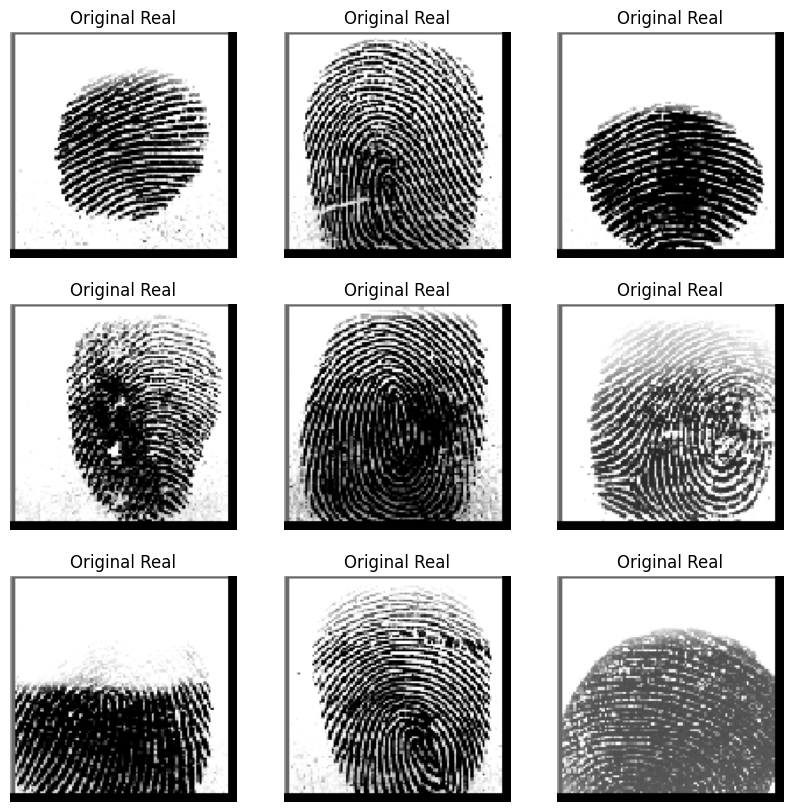

Displaying first 9 combined Altered images:


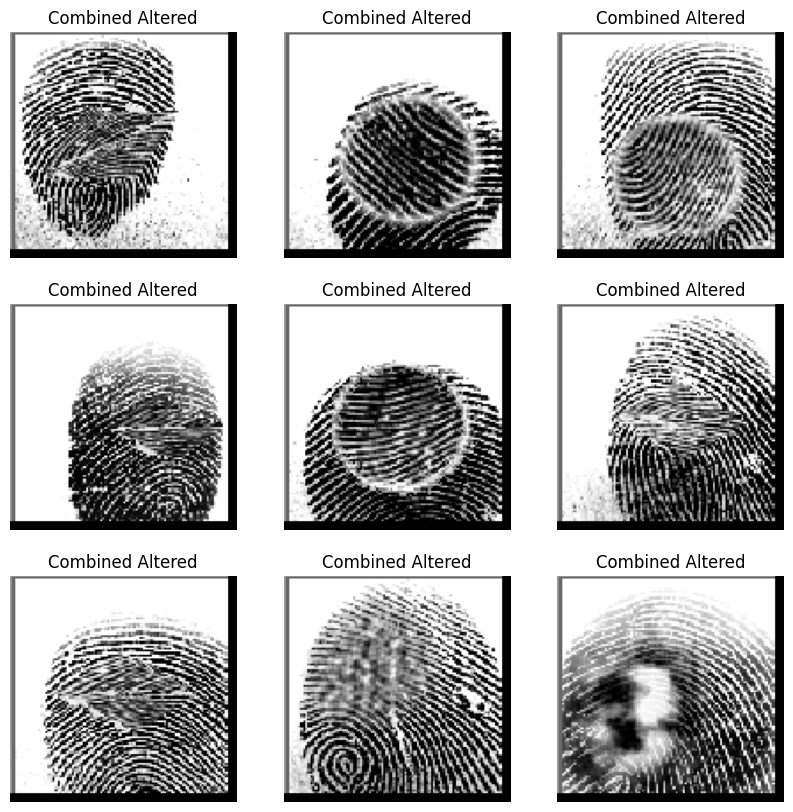

Displaying first 9 processed Real images:


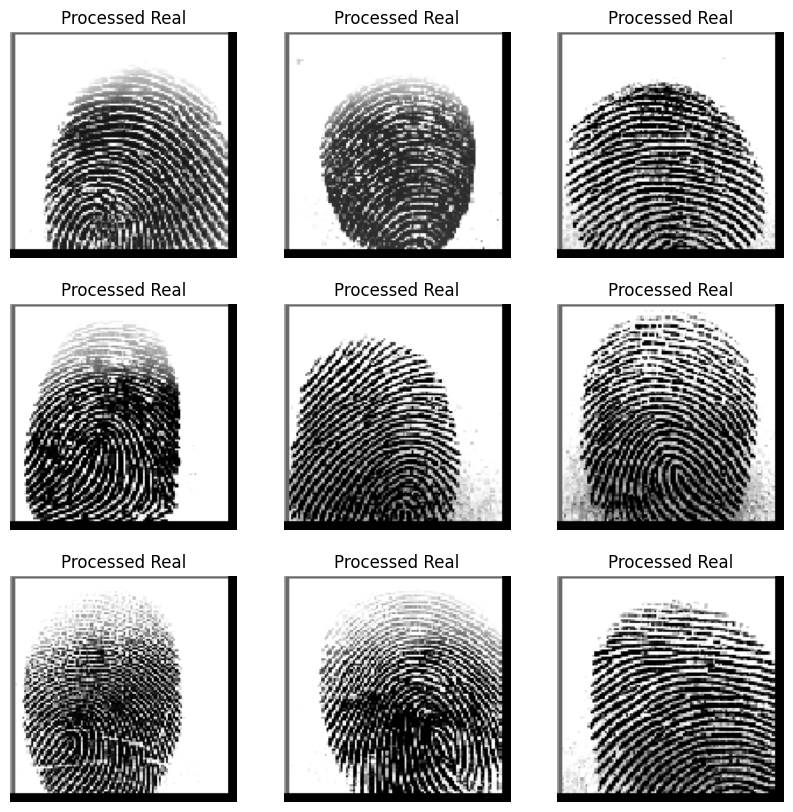

Displaying first 9 processed Altered images:


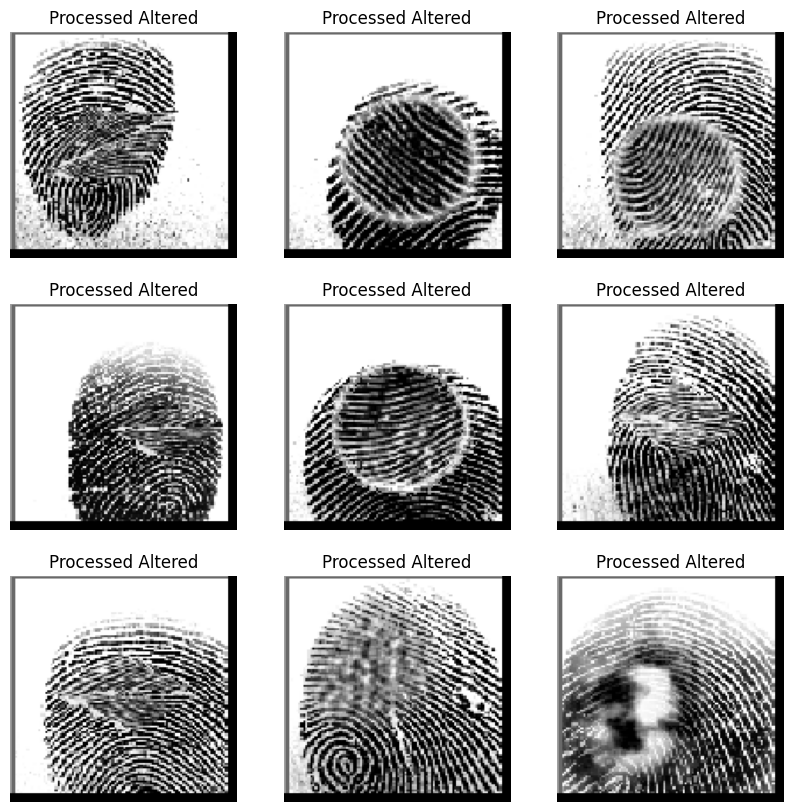

Displaying first 9 sample Real images:


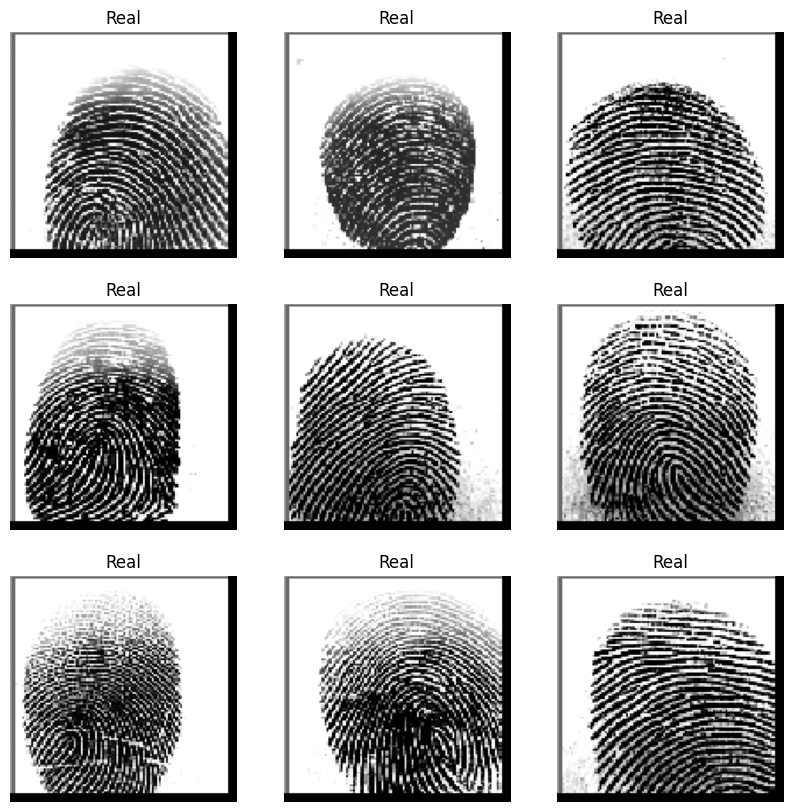

Displaying first 9 sample Altered images:


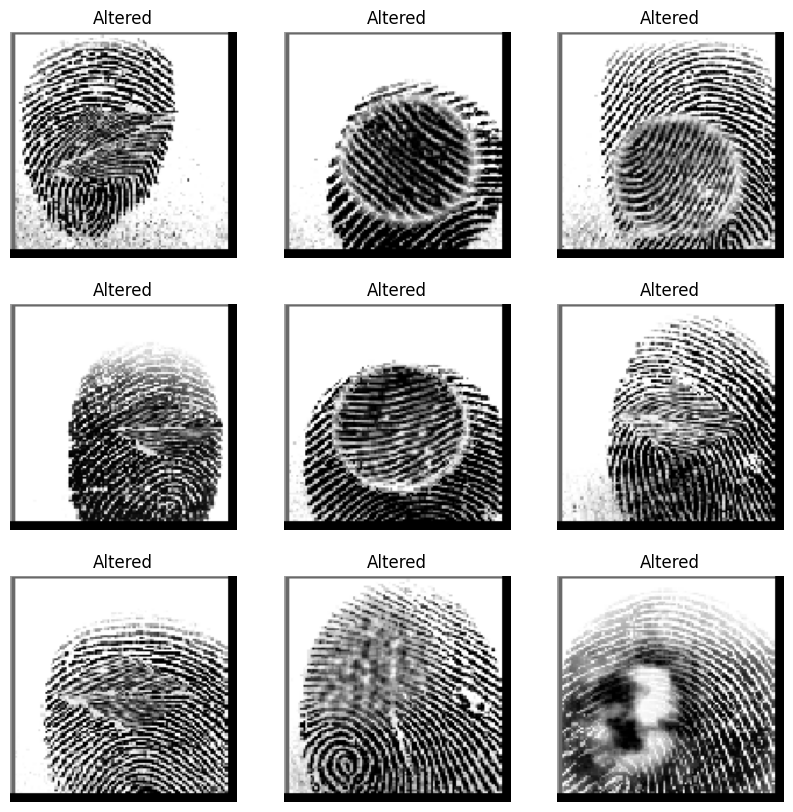

Step 4: Dataset preparation and sample images displayed successfully!


In [4]:
# Step 4: Visualize Dataset Preparation and Display Sample Images
def visualize_and_display_images(real_path, altered_combined_path, processed_dataset_path, num_images=9):
    def display_images(folder_path, title, num_images=9):
        images = []
        labels = []
        files = os.listdir(folder_path)[:num_images]  # Limit the number of images displayed
        for img_name in files:
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path, target_size=(128, 128))
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(title)

        plt.figure(figsize=(10, 10))
        for i in range(len(images)):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title(labels[i])
            plt.axis('off')
        plt.show()

    print("Step 4: Visualizing dataset preparation and displaying sample images...")

    # Display original Real images
    print(f"Displaying first {num_images} original Real images:")
    display_images(real_path, "Original Real", num_images)

    # Display combined Altered images
    print(f"Displaying first {num_images} combined Altered images:")
    display_images(altered_combined_path, "Combined Altered", num_images)

    # Display processed Real and Altered images
    print(f"Displaying first {num_images} processed Real images:")
    display_images(os.path.join(processed_dataset_path, "Real"), "Processed Real", num_images)

    print(f"Displaying first {num_images} processed Altered images:")
    display_images(os.path.join(processed_dataset_path, "Altered"), "Processed Altered", num_images)

    # Display additional sample Real and Altered images after processing
    print(f"Displaying first {num_images} sample Real images:")
    display_images(os.path.join(processed_dataset_path, "Real"), "Real", num_images)

    print(f"Displaying first {num_images} sample Altered images:")
    display_images(os.path.join(processed_dataset_path, "Altered"), "Altered", num_images)

    print("Step 4: Dataset preparation and sample images displayed successfully!")

# Call the combined visualization function
num_images_to_display = 9  # You can adjust this value as needed
visualize_and_display_images(real_path, altered_images_path, processed_dataset_path, num_images_to_display)

In [5]:
# Step 5: Data Augmentation and Generators
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow_from_directory(
    processed_dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
)

validation_generator = datagen.flow_from_directory(
    processed_dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
)
print("Step 4: Data augmentation and generators created successfully!")

Found 19163 images belonging to 2 classes.
Found 4790 images belonging to 2 classes.
Step 4: Data augmentation and generators created successfully!


In [6]:
# Step 6: Model Architecture
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

print("Step 6: Model created successfully!")
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully!")

Step 6: Model created successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,780,993 (10.61 MB)

 Trainable params: 2,780,993 (10.61 MB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully!


In [7]:
# Step 7: Metrics and Visualization Callback
class MetricsAndVisualization(tf.keras.callbacks.Callback):
    def __init__(self):
        super(MetricsAndVisualization, self).__init__()
        self.all_metrics = []

    def on_epoch_end(self, epoch, logs=None):
        val_true, val_pred = [], []

        for x_val, y_val in validation_generator:
            preds = (self.model.predict(x_val, verbose=(epoch == 0)) > 0.5).astype(int).flatten()
            val_true.extend(y_val)
            val_pred.extend(preds)
            if len(val_true) >= validation_generator.samples:
                break

        val_true = np.array(val_true[:validation_generator.samples])
        val_pred = np.array(val_pred[:validation_generator.samples])

        if len(val_true) == 0 or len(val_pred) == 0:
            print("Validation generator did not yield predictions.")
            return

        precision = precision_score(val_true, val_pred, zero_division=1) * 100
        recall = recall_score(val_true, val_pred, zero_division=1) * 100
        f1 = f1_score(val_true, val_pred, zero_division=1) * 100
        accuracy = logs['val_accuracy'] * 100

        # Collect metrics for final display
        self.all_metrics.append({
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "accuracy": accuracy,
            "loss": logs['loss'],
            "val_loss": logs['val_loss'],
            "val_accuracy": logs['val_accuracy']
        })

        # Print metrics for the current epoch
        print(f"\nEpoch {epoch + 1}")
        print(f"Precision: {precision:.2f}% | Recall: {recall:.2f}% | F1 Score: {f1:.2f}% | Accuracy: {accuracy:.2f}%")
        if epoch > 0:
            print(f"{train_generator.samples}/{train_generator.samples} - "
                  f"{int(logs['loss'] * 1000)}ms/step - "
                  f"loss: {logs['loss']:.4f} - val_loss: {logs['val_loss']:.4f} "
                  f"- val_accuracy: {logs['val_accuracy']:.4f}")

    def on_train_end(self, logs=None):
        # Combine metrics from all epochs
        avg_metrics = {
            key: np.mean([metrics[key] for metrics in self.all_metrics])
            for key in self.all_metrics[0]
        }
        print("\nFinal Metrics (Averaged Across Epochs):")
        print(f"Precision: {avg_metrics['precision']:.2f}% | Recall: {avg_metrics['recall']:.2f}% | "
              f"F1 Score: {avg_metrics['f1']:.2f}% | Accuracy: {avg_metrics['accuracy']:.2f}%")
        print(f"Loss: {avg_metrics['loss']:.4f} | Val Loss: {avg_metrics['val_loss']:.4f} | "
              f"Val Accuracy: {avg_metrics['val_accuracy']:.4f}")


In [8]:
# Step 8: Train the Model with Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[MetricsAndVisualization(), early_stopping],
    verbose=1
)
print("Step 8: Model training completed successfully!")


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/stepstep - accuracy: 0.8087 - loss: 0.43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2
Precision: 94.71% | Recall: 82.00% | F1 Score: 87.90% | Accuracy: 95.45%
19163/19163 - 65ms/step - loss: 0.0654 - val_loss: 0.1338 - val_accuracy: 0.9545
598/598 ━━━━━━━━━━━━━━━━━━━━ 59s 97ms/step - accuracy: 1.0000 - loss: 0.0654 - val_accuracy: 0.9545 - val_loss: 0.1338
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.9486 - loss: 0.1384
Epoch 3
Precision: 88.54% | Recall: 96.58% | F1 Score: 92.39% | Accuracy: 96.10%
19163/19163 - 131ms/step - loss: 0.1315 - val_loss: 0.1032 - val_accuracy: 0.9610
598/598 ━━━━━━━━━━━━━━━━━━━━ 438s 731ms/step - accuracy: 0.9486 - loss: 0.1383 - val_accuracy: 0.9610 - val_loss: 0.1032
Epoch 4/20
  1/598 ━━━━━━━━━━━━━━━━━━━━ 5:07 514ms/step - accuracy: 0.9688 - loss: 0.0804

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 4
Precision: 90.50% | Recall: 95.25% | F1 Score: 92.81% | Accuracy: 100.00%
19163/19163 - 80ms/step - loss: 0.0804 - val_loss: 0.0533 - val_accuracy: 1.0000
598/598 ━━━━━━━━━━━━━━━━━━━━ 55s 92ms/step - accuracy: 0.9688 - loss: 0.0804 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 5/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.9599 - loss: 0.1067
Epoch 5
Precision: 92.16% | Recall: 97.00% | F1 Score: 94.52% | Accuracy: 97.23%
19163/19163 - 104ms/step - loss: 0.1044 - val_loss: 0.0796 - val_accuracy: 0.9723
598/598 ━━━━━━━━━━━━━━━━━━━━ 453s 756ms/step - accuracy: 0.9599 - loss: 0.1067 - val_accuracy: 0.9723 - val_loss: 0.0796
Epoch 6/20
  1/598 ━━━━━━━━━━━━━━━━━━━━ 5:03 509ms/step - accuracy: 0.9375 - loss: 0.1288

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 6
Precision: 92.70% | Recall: 96.25% | F1 Score: 94.44% | Accuracy: 100.00%
19163/19163 - 128ms/step - loss: 0.1288 - val_loss: 0.0220 - val_accuracy: 1.0000
598/598 ━━━━━━━━━━━━━━━━━━━━ 58s 97ms/step - accuracy: 0.9375 - loss: 0.1288 - val_accuracy: 1.0000 - val_loss: 0.0220
Epoch 7/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9677 - loss: 0.0865
Epoch 7
Precision: 96.07% | Recall: 91.58% | F1 Score: 93.77% | Accuracy: 97.42%
19163/19163 - 86ms/step - loss: 0.0869 - val_loss: 0.0776 - val_accuracy: 0.9742
598/598 ━━━━━━━━━━━━━━━━━━━━ 446s 744ms/step - accuracy: 0.9677 - loss: 0.0865 - val_accuracy: 0.9742 - val_loss: 0.0776
Epoch 8/20
  1/598 ━━━━━━━━━━━━━━━━━━━━ 5:18 533ms/step - accuracy: 0.9375 - loss: 0.1919

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 8
Precision: 94.61% | Recall: 93.67% | F1 Score: 94.14% | Accuracy: 95.45%
19163/19163 - 191ms/step - loss: 0.1919 - val_loss: 0.0548 - val_accuracy: 0.9545
598/598 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.9375 - loss: 0.1919 - val_accuracy: 0.9545 - val_loss: 0.0548
Epoch 9/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9704 - loss: 0.0860
Epoch 9
Precision: 93.52% | Recall: 98.67% | F1 Score: 96.03% | Accuracy: 98.01%
19163/19163 - 84ms/step - loss: 0.0842 - val_loss: 0.0562 - val_accuracy: 0.9801
598/598 ━━━━━━━━━━━━━━━━━━━━ 444s 740ms/step - accuracy: 0.9705 - loss: 0.0860 - val_accuracy: 0.9801 - val_loss: 0.0562

Final Metrics (Averaged Across Epochs):
Precision: 92.92% | Recall: 92.66% | F1 Score: 92.65% | Accuracy: 97.09%
Loss: 0.1315 | Val Loss: 0.0806 | Val Accuracy: 0.9709
Step 8: Model training completed successfully!


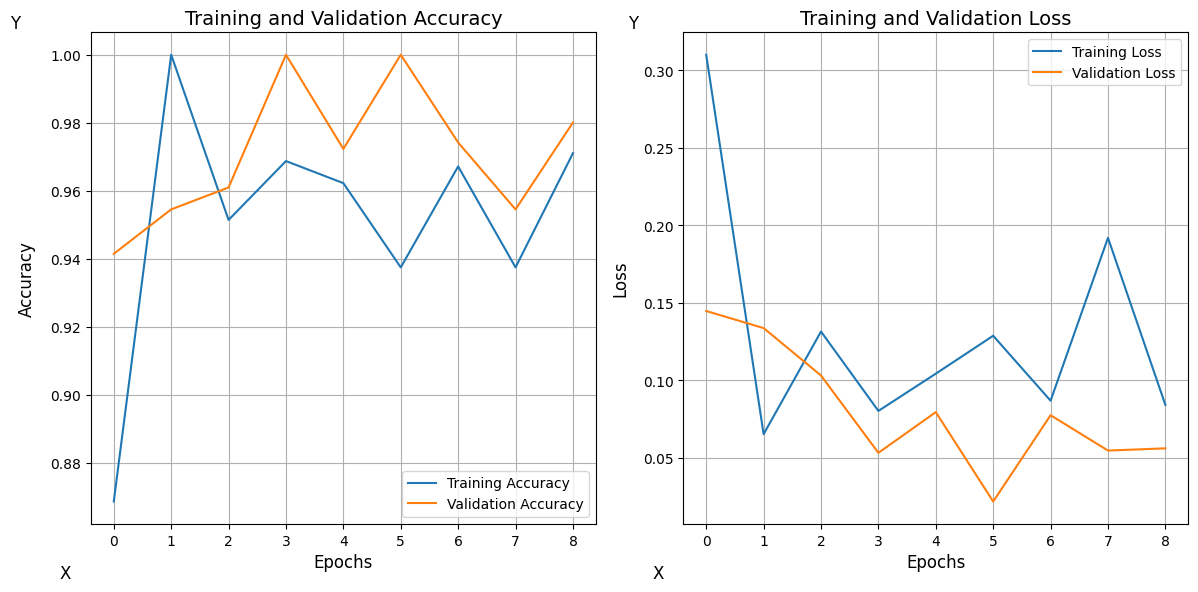

Step 9: Training visualization with axis labels completed successfully!


In [9]:
# Step 9: Training Visualization with Axis Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Training and Validation Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs', fontsize=12)  # Label for X-axis
plt.ylabel('Accuracy', fontsize=12, labelpad=10)  # Label for Y-axis with padding to move right
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)  # Add grid lines for better visualization

# Adding "X" label at the bottom left of the plot, close to the graph but to the left
plt.text(-0.05, -0.1, 'X', fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Adding "Y" label at the top left of the plot, near the graph
plt.text(-0.15, 1.02, 'Y', fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Training and Validation Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12, labelpad=10)  # Label for Y-axis with padding to move right
plt.title('Training and Validation Loss', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Adjusting the "Y" label for the validation loss plot to move it a bit to the right
plt.text(-0.10, 1.02, 'Y', fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Adding "X" label at the bottom left of the plot, close to the graph but to the left
plt.text(-0.05, -0.1, 'X', fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Display the plots
plt.tight_layout()  # Adjusts the subplots to prevent overlap
plt.show()

print("Step 9: Training visualization with axis labels completed successfully!")

In [10]:
# Step 10: Save the Model
model_path = "/kaggle/working/socofing_fingerprint_model.h5"
model.save(model_path)
print(f"Step 10: Model saved successfully at {model_path}!")


Step 10: Model saved successfully at /kaggle/working/socofing_fingerprint_model.h5!


In [11]:
# Step 10.1: Load the trained model
model_path = "/kaggle/working/socofing_fingerprint_model.h5"
loaded_model = load_model(model_path)
print("Step 10.1: Model loaded successfully!")


Step 10.1: Model loaded successfully!


In [12]:
# Step 10.2: 
import os
print(os.listdir("/kaggle/working/"))

['Processed_Socofing', 'socofing_fingerprint_model.h5', '.virtual_documents', 'Altered_Combined']


In [13]:
# Step 11: Test trained Fingerprint Dataset
def predict_image(model, img_path):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Altered" if prediction[0][0] < 0.5 else "Real"

# Function to display a single image
def display_image(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array)
    plt.axis('off')
    plt.title("Test Image")
    plt.show()

# Load the model (update the path to your model file)
model_path = "/kaggle/working/socofing_fingerprint_model.h5"  # Update this path
model = load_model(model_path)

# Test with a new fingerprint
external_img_path = "/kaggle/input/socofing/SOCOFing/Altered/Altered-Hard/100__M_Left_little_finger_Obl.BMP"  # Replace with the path to your fingerprint image

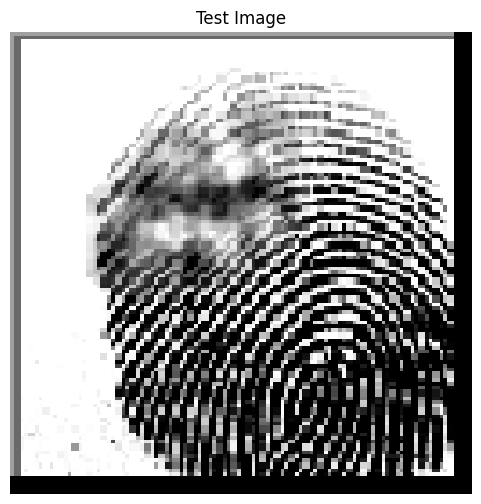

Step 11.1: trained dataset image displayed successfully!


In [14]:
# Step 11.1: Display the trained dataset image
display_image(external_img_path)
print("Step 11.1: trained dataset image displayed successfully!")

In [15]:
# Step 11.2: Classify the test image
result = predict_image(model, external_img_path)
print(f"Step 11.2: The image is classified as: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Step 11.2: The image is classified as: Altered


In [16]:
# Step 12: Preprocess the fingerprint image for model prediction
def preprocess_fingerprint(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = cv2.equalizeHist(gray_img)
    img_eq = cv2.merge([gray_img, gray_img, gray_img])
    img_array = img_to_array(img_eq) / 255.0  # Normalize to [0, 1] range
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [17]:
# Step 12.1: Predict the class of the fingerprint image
def predict_image(model, img_path):
    preprocessed_image = preprocess_fingerprint(img_path)
    prediction = model.predict(preprocessed_image)
    return "Altered" if prediction[0][0] < 0.5 else "Real"


In [18]:
# Step 12.2: Display a single image
def display_single_image(image_path):
    """
    Displays a single image from the specified path.
    """
    img = load_img(image_path, target_size=(128, 128))  # Adjust target_size if needed
    img_array = img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array)
    plt.axis('off')
    plt.title("Custom Test Image")
    plt.show()

# Main execution
model_path = "/kaggle/working/socofing_fingerprint_model.h5"  # Update this path to your model
loaded_model = load_model(model_path)

# Replace this path with the path to your custom test image
custom_test_image_path = "/kaggle/input/socofing/SOCOFing/Real/100__M_Left_thumb_finger.BMP"  # Update this path

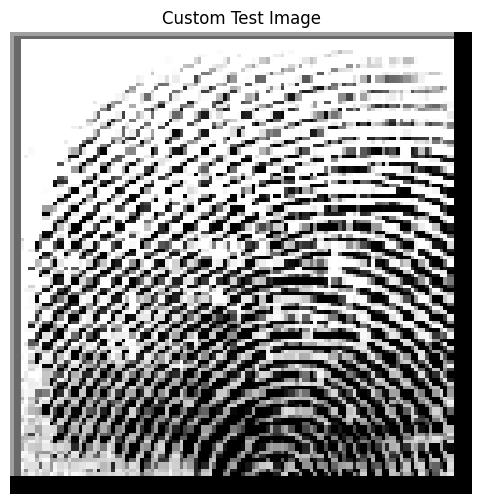

Step 12.3: Custom single test image displayed successfully!


In [19]:
# Step 12.3: Display the custom test image
display_single_image(custom_test_image_path)
print("Step 12.3: Custom single test image displayed successfully!")


In [20]:
# Step 12.4: Test the model with the custom image
result = predict_image(loaded_model, custom_test_image_path)
print(f"The fingerprint is classified as: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The fingerprint is classified as: Real
